# **NUMBER RECOGNITION**

In [ ]:
! unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **LOAD ALL LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **LOAD THE DATA**

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape


(42000, 785)

In [ ]:
test.shape

(28000, 784)

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info(max_cols = 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     42000 non-null  int64
 1    pixel0    42000 non-null  int64
 2    pixel1    42000 non-null  int64
 3    pixel2    42000 non-null  int64
 4    pixel3    42000 non-null  int64
 5    pixel4    42000 non-null  int64
 6    pixel5    42000 non-null  int64
 7    pixel6    42000 non-null  int64
 8    pixel7    42000 non-null  int64
 9    pixel8    42000 non-null  int64
 10   pixel9    42000 non-null  int64
 11   pixel10   42000 non-null  int64
 12   pixel11   42000 non-null  int64
 13   pixel12   42000 non-null  int64
 14   pixel13   42000 non-null  int64
 15   pixel14   42000 non-null  int64
 16   pixel15   42000 non-null  int64
 17   pixel16   42000 non-null  int64
 18   pixel17   42000 non-null  int64
 19   pixel18   42000 non-null  int64
 20   pixel19   42000 non-null  int64
 21   pixel20   

In [ ]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

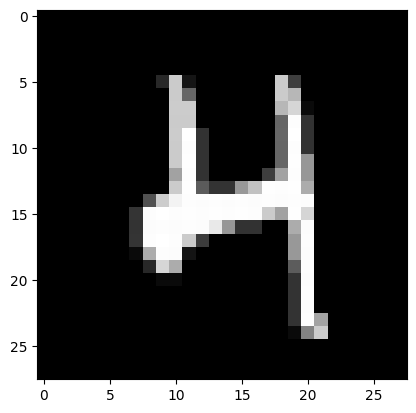

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 11500
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

# **MODEL PROCESS**


Divide the data into x and y

In [ ]:
x = train.iloc[:,1:]
y = train['label']

In [ ]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [ ]:
acc_report(y_train,preds_rf_train)

The Accuracy of the model is: 1.0
[[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 3276    0    0    0    0    0]
 [   0    0    0    0    0 2995    0    0    0    0]
 [   0    0    0    0    0    0 3267    0    0    0]
 [   0    0    0    0    0    0    0 3541    0    0]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    0    0    0    0    0    0 3361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
  

In [ ]:
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 0.97
[[776   0   0   0   1   1   2   1   4   0]
 [  0 932   7   4   1   1   1   0   2   1]
 [  2   1 805  10   1   2   4   3   7   3]
 [  1   0  12 814   1   8   0   6  13   3]
 [  1   2   0   0 774   0   3   1   5  10]
 [  2   1   1  14   1 769   7   0   3   2]
 [  4   1   0   0   1   9 852   0   3   0]
 [  1   1  13   0   6   0   0 831   3   5]
 [  3   6   2   6   3   4   7   0 778   8]
 [  7   1   2   9  14   2   0   9   1 782]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       785
           1       0.99      0.98      0.98       949
           2       0.96      0.96      0.96       838
           3       0.95      0.95      0.95       858
           4       0.96      0.97      0.97       796
           5       0.97      0.96      0.96       800
           6       0.97      0.98      0.98       870
           7       0.98      0.97      0.97       860
           8       0.95      0.95      0.95    

# **SINGLE LAYER PERCEPTRON**

In [ ]:
slp = Perceptron(verbose = 1)
slp.fit(x_train, y_train)
preds_slp_train = slp.predict(x_train)
preds_slp_test = slp.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.44 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.51 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.57 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.65 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.73 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
acc_report(y_train,preds_slp_train)

The Accuracy of the model is: 0.89
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
 

In [ ]:
acc_report(y_test,preds_slp_test)

The Accuracy of the model is: 0.87
[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      0.78    

# **MULTILAYER PERCEPTRON**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (128,128,128), verbose = 1, max_iter = 250)

In [ ]:
mlp.fit(x_train,y_train)
pred_train_mlp=mlp.predict(x_train)
pred_test_mlp=mlp.predict(x_test)

Iteration 1, loss = 2.51505178
Iteration 2, loss = 0.52384208
Iteration 3, loss = 0.28494481
Iteration 4, loss = 0.18266361
Iteration 5, loss = 0.12503087
Iteration 6, loss = 0.08794036
Iteration 7, loss = 0.06568016
Iteration 8, loss = 0.06275788
Iteration 9, loss = 0.05899127
Iteration 10, loss = 0.05425508
Iteration 11, loss = 0.07333243
Iteration 12, loss = 0.06479346
Iteration 13, loss = 0.06361036
Iteration 14, loss = 0.06939547
Iteration 15, loss = 0.07817345
Iteration 16, loss = 0.08025732
Iteration 17, loss = 0.07105242
Iteration 18, loss = 0.05258753
Iteration 19, loss = 0.05222797
Iteration 20, loss = 0.07452195
Iteration 21, loss = 0.05753452
Iteration 22, loss = 0.04833574
Iteration 23, loss = 0.05768783
Iteration 24, loss = 0.03765035
Iteration 25, loss = 0.03843033
Iteration 26, loss = 0.03755056
Iteration 27, loss = 0.04142156
Iteration 28, loss = 0.05411568
Iteration 29, loss = 0.06026539
Iteration 30, loss = 0.04993930
Iteration 31, loss = 0.03639321
Iteration 32, los

In [ ]:
acc_report(y_train,pred_train_mlp)
acc_report(y_test,pred_test_mlp)

The Accuracy of the model is: 1.0
[[3342    0    3    0    0    0    1    0    1    0]
 [   0 3730    1    1    1    0    0    2    0    0]
 [   0    2 3330    2    0    0    0    5    0    0]
 [   1    0    4 3481    0    0    0    3    4    0]
 [   0    0    8    1 3247    0    3    0    2   15]
 [   1    1    0    7    1 2979    2    0    3    1]
 [   1    0    0    0    0    1 3264    0    1    0]
 [   0    1    7    0    0    0    0 3530    0    3]
 [   1    0    6    1    0    0    0    0 3238    0]
 [   1    0    1    1    1    4    0   13    8 3332]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       0.99      1.00      0.99      3339
           3       1.00      1.00      1.00      3493
           4       1.00      0.99      1.00      3276
           5       1.00      0.99      1.00      2995
           6       1.00      1.00      1.00      3267
  

# **IMPLEMENTATION USING TENSORFLOW**

# **LOAD THE TENSORFLOW LIBRARIES**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras .losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# **DECLARE THE MODEL - SEQUENTIONAL OR FUNCTIONAL**

In [ ]:
model = Sequential()

# **DECLARE THE LAYERS - DENSE**

In [ ]:
model.add(Dense(512,activation = 'relu' , input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

# **COMPILE THE MODEL**

In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# **FIT THE MODEL**

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_train_ohe.shape)

(33600,)
(33600, 10)


In [ ]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
hist = model.fit(x_train, y_train_ohe , validation_data = (x_test , y_test_ohe), epochs =50 ,  batch_size = 64,verbose = 2)

Epoch 1/50
525/525 - 10s - loss: 2.4864 - accuracy: 0.8257 - val_loss: 0.2756 - val_accuracy: 0.9265 - 10s/epoch - 19ms/step
Epoch 2/50
525/525 - 8s - loss: 0.3712 - accuracy: 0.9021 - val_loss: 0.1897 - val_accuracy: 0.9445 - 8s/epoch - 16ms/step
Epoch 3/50
525/525 - 9s - loss: 0.2581 - accuracy: 0.9277 - val_loss: 0.1636 - val_accuracy: 0.9513 - 9s/epoch - 16ms/step
Epoch 4/50
525/525 - 9s - loss: 0.2202 - accuracy: 0.9389 - val_loss: 0.1692 - val_accuracy: 0.9535 - 9s/epoch - 16ms/step
Epoch 5/50
525/525 - 8s - loss: 0.1939 - accuracy: 0.9454 - val_loss: 0.1569 - val_accuracy: 0.9568 - 8s/epoch - 15ms/step
Epoch 6/50
525/525 - 9s - loss: 0.1850 - accuracy: 0.9488 - val_loss: 0.1672 - val_accuracy: 0.9581 - 9s/epoch - 16ms/step
Epoch 7/50
525/525 - 9s - loss: 0.1788 - accuracy: 0.9513 - val_loss: 0.1452 - val_accuracy: 0.9623 - 9s/epoch - 16ms/step
Epoch 8/50
525/525 - 8s - loss: 0.1644 - accuracy: 0.9548 - val_loss: 0.1459 - val_accuracy: 0.9640 - 8s/epoch - 15ms/step
Epoch 9/50
525

<function matplotlib.pyplot.show(close=None, block=None)>

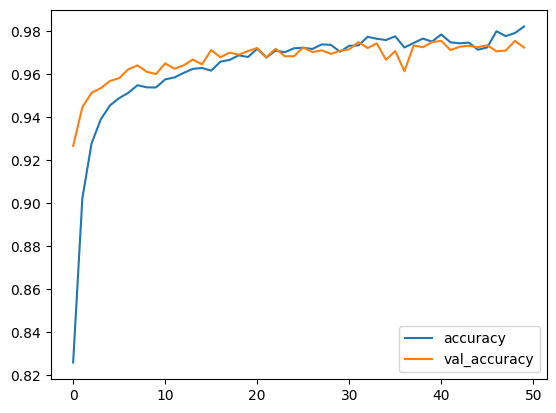

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show

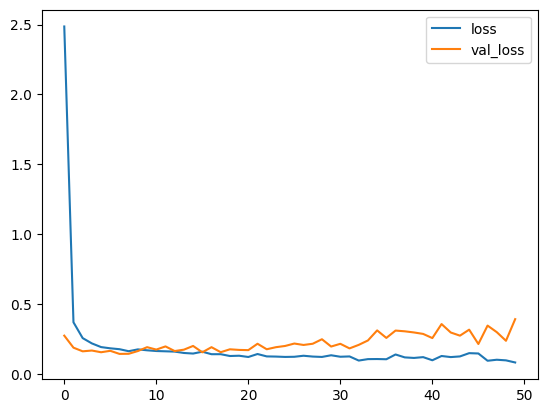

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
preds_y_train = model.predict(x_train)

1050/1050 [==============================] - 4s 4ms/step


In [ ]:
preds_y_train[1]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4498757e-17,
       2.5218776e-21, 1.0610898e-28, 0.0000000e+00, 2.1375357e-25,
       4.7308781e-31, 9.9999994e-01], dtype=float32)

In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
preds_ytrain_class = np.argmax(preds_y_train , axis = 1)

In [ ]:
preds_ytrain_class

array([2, 9, 2, ..., 9, 6, 7])

In [ ]:
acc_report(y_train,preds_ytrain_class)

The Accuracy of the model is: 0.99
[[3341    0    0    0    0    0    0    0    5    1]
 [   0 3729    0    0    0    0    0    1    5    0]
 [   2    1 3256    5    0    0    1   57   17    0]
 [   0    0    1 3456    0    4    0   12   13    7]
 [   3    1    0    0 3244    0    0   20    4    4]
 [   2    0    0    7    0 2963   10    0   13    0]
 [   9    0    0    0    1    0 3250    1    6    0]
 [   0    0    0    1    0    0    0 3533    6    1]
 [   3    3    2    4    0    0   13    0 3213    8]
 [   4    0    0    7    8    1    0   29    8 3304]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      0.98      0.99      3339
           3       0.99      0.99      0.99      3493
           4       1.00      0.99      0.99      3276
           5       1.00      0.99      0.99      2995
           6       0.99      0.99      0.99      3267
 

In [ ]:
preds_ytest_class = np.argmax(model.predict(x_test), axis = 1)

263/263 [==============================] - 1s 5ms/step


In [ ]:
acc_report(y_test,preds_ytest_class)

The Accuracy of the model is: 0.97
[[777   0   0   0   0   0   0   0   8   0]
 [  0 939   2   0   1   1   1   2   3   0]
 [  1   1 792   3   0   0   0  33   6   2]
 [  0   0   0 837   0   2   0  10   5   4]
 [  1   3   0   0 771   0   1  14   2   4]
 [  2   1   1  11   1 770   6   0   5   3]
 [  1   1   0   0   1   1 861   1   4   0]
 [  0   3   2   2   0   0   0 852   1   0]
 [  3   5   0   3   2   7   7   1 781   8]
 [  4   0   0   2   8   3   0  19   3 788]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       785
           1       0.99      0.99      0.99       949
           2       0.99      0.95      0.97       838
           3       0.98      0.98      0.98       858
           4       0.98      0.97      0.98       796
           5       0.98      0.96      0.97       800
           6       0.98      0.99      0.99       870
           7       0.91      0.99      0.95       860
           8       0.95      0.96      0.96    